# Laboratorium 3
## Marcin Ogórkiewicz
### 21.05.2025

### Zadanie 1
#### Wybrać 3 środowiska dostępne w samej bibliotece Stable Baselines 3, lub comunity wykorzystujących jej API. Zaleca się, aby były to jak najbardziej różne środowiska

In [16]:
import gymnasium as gym
import torch
import numpy as np
from stable_baselines3.common.env_util import make_vec_env

# Sprawdzanie dostępności CUDA
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Używane urządzenie: {device}")
print(f"CUDA dostępna: {torch.cuda.is_available()}")
if torch.cuda.is_available():
    print(f"GPU: {torch.cuda.get_device_name(0)}")

# Środowisko 1:
env1_name = "CartPole-v1"
env1 = gym.make(env1_name)
print(f"\nŚrodowisko 1: {env1_name}")
print(f"Przestrzeń obserwacji: {env1.observation_space}")
print(f"Przestrzeń akcji: {env1.action_space}")

# Środowisko 2:
env2_name = "MountainCar-v0"
env2 = gym.make(env2_name)
print(f"\nŚrodowisko 2: {env2_name}")
print(f"Przestrzeń obserwacji: {env2.observation_space}")
print(f"Przestrzeń akcji: {env2.action_space}")

# Środowisko 3:
env3_name = "Acrobot-v1"
env3 = gym.make(env3_name)
print(f"\nŚrodowisko 3: {env3_name}")
print(f"Przestrzeń obserwacji: {env3.observation_space}")
print(f"Przestrzeń akcji: {env3.action_space}")

Używane urządzenie: cuda
CUDA dostępna: True
GPU: NVIDIA GeForce RTX 3050 Laptop GPU

Środowisko 1: CartPole-v1
Przestrzeń obserwacji: Box([-4.8               -inf -0.41887903        -inf], [4.8               inf 0.41887903        inf], (4,), float32)
Przestrzeń akcji: Discrete(2)

Środowisko 2: MountainCar-v0
Przestrzeń obserwacji: Box([-1.2  -0.07], [0.6  0.07], (2,), float32)
Przestrzeń akcji: Discrete(3)

Środowisko 3: Acrobot-v1
Przestrzeń obserwacji: Box([ -1.        -1.        -1.        -1.       -12.566371 -28.274334], [ 1.        1.        1.        1.       12.566371 28.274334], (6,), float32)
Przestrzeń akcji: Discrete(3)


### Zadanie 2
#### Dla każdego z wybranych środowisk dobrać model z biblioteki Stable Baselines 3

In [17]:
from stable_baselines3 import PPO, DQN, A2C

# Dla CartPole (dyskretna przestrzeń akcji, prosta dynamika)
model1 = PPO("MlpPolicy", env1, verbose=1, device=device)

# Dla MountainCar (dyskretna przestrzeń akcji, bardziej złożona dynamika)
model2 = DQN("MlpPolicy", env2, verbose=1, device=device,
             learning_rate=1e-3,
             buffer_size=50000,
             learning_starts=1000,
             batch_size=64,
             exploration_fraction=0.2)

# Dla Acrobot (dyskretna przestrzeń akcji, złożona dynamika)
model3 = A2C("MlpPolicy", env3, verbose=1, device=device,
            learning_rate=7e-4)

print("\nWybrane modele z akceleracją CUDA:")
print(f"Środowisko 1 ({env1_name}): PPO")
print(f"Środowisko 2 ({env2_name}): DQN")
print(f"Środowisko 3 ({env3_name}): A2C")

# Wyjaśnienie wyboru modeli
print("\nUzasadnienie wyboru modeli:")
print("- PPO dla CartPole: Dobry dla prostych środowisk z dyskretną przestrzenią akcji, stabilne uczenie")
print("- DQN dla MountainCar: Skuteczny dla dyskretnych przestrzeni akcji z opóźnioną nagrodą")
print("- A2C dla Acrobot: Efektywny algorytm policy-gradient dla środowisk z dyskretną przestrzenią akcji")

Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.

Wybrane modele z akceleracją CUDA:
Środowisko 1 (CartPole-v1): PPO
Środowisko 2 (MountainCar-v0): DQN
Środowisko 3 (Acrobot-v1): A2C

Uzasadnienie wyboru modeli:
- PPO dla CartPole: Dobry dla prostych środowisk z dyskretną przestrzenią akcji, stabilne uczenie
- DQN dla MountainCar: Skuteczny dla dyskretnych przestrzeni akcji z opóźnioną nagrodą
- A2C dla Acrobot: Efektywny algorytm policy-gradient dla środowisk z dyskretną przestrzenią akcji


### Zadanie 3
#### Dla każdego z wybranych środowisk przeprowadzić trening modelu

In [18]:
from stable_baselines3.common.callbacks import EvalCallback
from stable_baselines3.common.monitor import Monitor
import os
import time

# Tworzenie katalogów do zapisu modeli
os.makedirs("trained_models", exist_ok=True)
os.makedirs("logs", exist_ok=True)

# Tworzenie środowisk ewaluacyjnych
eval_env1 = Monitor(gym.make(env1_name))
eval_env2 = Monitor(gym.make(env2_name))
eval_env3 = Monitor(gym.make(env3_name))

# Tworzenie callbacków do ewaluacji
eval_callback1 = EvalCallback(eval_env1, best_model_save_path="./trained_models/model1/",
                             log_path="./logs/", eval_freq=1000,
                             deterministic=True, render=False, n_eval_episodes=5)

eval_callback2 = EvalCallback(eval_env2, best_model_save_path="./trained_models/model2/",
                             log_path="./logs/", eval_freq=1000,
                             deterministic=True, render=False, n_eval_episodes=5)

eval_callback3 = EvalCallback(eval_env3, best_model_save_path="./trained_models/model3/",
                             log_path="./logs/", eval_freq=1000,
                             deterministic=True, render=False, n_eval_episodes=5)

# Parametry treningu - zoptymalizowane dla akceleracji GPU
timesteps1 = 50000   # CartPole
timesteps2 = 100000  # MountainCar
timesteps3 = 70000   # Acrobot

training_results = []

# Trening modelu 1
print(f"\nTrening modelu dla {env1_name} przy użyciu {device}...")
start_time = time.time()
model1.learn(total_timesteps=timesteps1, callback=eval_callback1)
end_time = time.time()
training_time1 = end_time - start_time
model1.save(f"trained_models/final_ppo_{env1_name}")
training_results.append({
    "Środowisko": env1_name,
    "Algorytm": "PPO",
    "Czas treningu (s)": training_time1,
    "Całkowita liczba kroków": timesteps1
})
print(f"Trening zakończony w {training_time1:.2f} sekund")

# Trening modelu 2
print(f"\nTrening modelu dla {env2_name} przy użyciu {device}...")
start_time = time.time()
model2.learn(total_timesteps=timesteps2, callback=eval_callback2)
end_time = time.time()
training_time2 = end_time - start_time
model2.save(f"trained_models/final_dqn_{env2_name}")
training_results.append({
    "Środowisko": env2_name,
    "Algorytm": "DQN",
    "Czas treningu (s)": training_time2,
    "Całkowita liczba kroków": timesteps2
})
print(f"Trening zakończony w {training_time2:.2f} sekund")

# Trening modelu 3
print(f"\nTrening modelu dla {env3_name} przy użyciu {device}...")
start_time = time.time()
model3.learn(total_timesteps=timesteps3, callback=eval_callback3)
end_time = time.time()
training_time3 = end_time - start_time
model3.save(f"trained_models/final_a2c_{env3_name}")
training_results.append({
    "Środowisko": env3_name,
    "Algorytm": "A2C",
    "Czas treningu (s)": training_time3,
    "Całkowita liczba kroków": timesteps3
})
print(f"Trening zakończony w {training_time3:.2f} sekund")

print("\nWszystkie modele zostały wytrenowane i zapisane.")

# Wyświetlanie informacji o czasie treningu
import pandas as pd
from tabulate import tabulate
df = pd.DataFrame(training_results)
print("\nPodsumowanie wydajności treningu:")
print(tabulate(df, headers='keys', tablefmt='grid', showindex=False))


Trening modelu dla CartPole-v1 przy użyciu cuda...
Eval num_timesteps=1000, episode_reward=57.00 +/- 27.22
Episode length: 57.00 +/- 27.22
---------------------------------
| eval/              |          |
|    mean_ep_length  | 57       |
|    mean_reward     | 57       |
| time/              |          |
|    total_timesteps | 1000     |
---------------------------------
New best mean reward!
Eval num_timesteps=2000, episode_reward=56.60 +/- 20.92
Episode length: 56.60 +/- 20.92
---------------------------------
| eval/              |          |
|    mean_ep_length  | 56.6     |
|    mean_reward     | 56.6     |
| time/              |          |
|    total_timesteps | 2000     |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 23.2     |
|    ep_rew_mean     | 23.2     |
| time/              |          |
|    fps             | 729      |
|    iterations      | 1        |
|    time_elapsed    | 2        |
| 

### Zadanie 4
#### Wykonać test i zebrać wyniki działania modelu (uzyskana nagroda)

Wczytywanie wytrenowanych modeli...
Wczytano zapisane modele.

Ewaluacja CartPole-v1 z PPO:


/home/marcin/PycharmProjects/arisc/.venv/lib/python3.12/site-packages/stable_baselines3/common/on_policy_algorithm.py:150: UserWarning: You are trying to run PPO on the GPU, but it is primarily intended to run on the CPU when not using a CNN policy (you are using ActorCriticPolicy which should be a MlpPolicy). See https://github.com/DLR-RM/stable-baselines3/issues/1245 for more info. You can pass `device='cpu'` or `export CUDA_VISIBLE_DEVICES=` to force using the CPU.Note: The model will train, but the GPU utilization will be poor and the training might take longer than on CPU.
  warnings.warn(
/home/marcin/PycharmProjects/arisc/.venv/lib/python3.12/site-packages/stable_baselines3/common/on_policy_algorithm.py:150: UserWarning: You are trying to run A2C on the GPU, but it is primarily intended to run on the CPU when not using a CNN policy (you are using ActorCriticPolicy which should be a MlpPolicy). See https://github.com/DLR-RM/stable-baselines3/issues/1245 for more info. You can pas

Epizod 1: Nagroda = 374.00, Kroki = 374
Epizod 2: Nagroda = 377.00, Kroki = 377
Epizod 3: Nagroda = 410.00, Kroki = 410
Epizod 4: Nagroda = 500.00, Kroki = 500
Epizod 5: Nagroda = 417.00, Kroki = 417
Epizod 6: Nagroda = 374.00, Kroki = 374
Epizod 7: Nagroda = 500.00, Kroki = 500
Epizod 8: Nagroda = 500.00, Kroki = 500
Epizod 9: Nagroda = 378.00, Kroki = 378
Epizod 10: Nagroda = 500.00, Kroki = 500

Ewaluacja MountainCar-v0 z DQN:
Epizod 1: Nagroda = -100.00, Kroki = 100
Epizod 2: Nagroda = -167.00, Kroki = 167
Epizod 3: Nagroda = -97.00, Kroki = 97
Epizod 4: Nagroda = -85.00, Kroki = 85
Epizod 5: Nagroda = -200.00, Kroki = 200
Epizod 6: Nagroda = -200.00, Kroki = 200
Epizod 7: Nagroda = -200.00, Kroki = 200
Epizod 8: Nagroda = -87.00, Kroki = 87
Epizod 9: Nagroda = -94.00, Kroki = 94
Epizod 10: Nagroda = -200.00, Kroki = 200

Ewaluacja Acrobot-v1 z A2C:
Epizod 1: Nagroda = -100.00, Kroki = 101
Epizod 2: Nagroda = -71.00, Kroki = 72
Epizod 3: Nagroda = -70.00, Kroki = 71
Epizod 4: Nagro

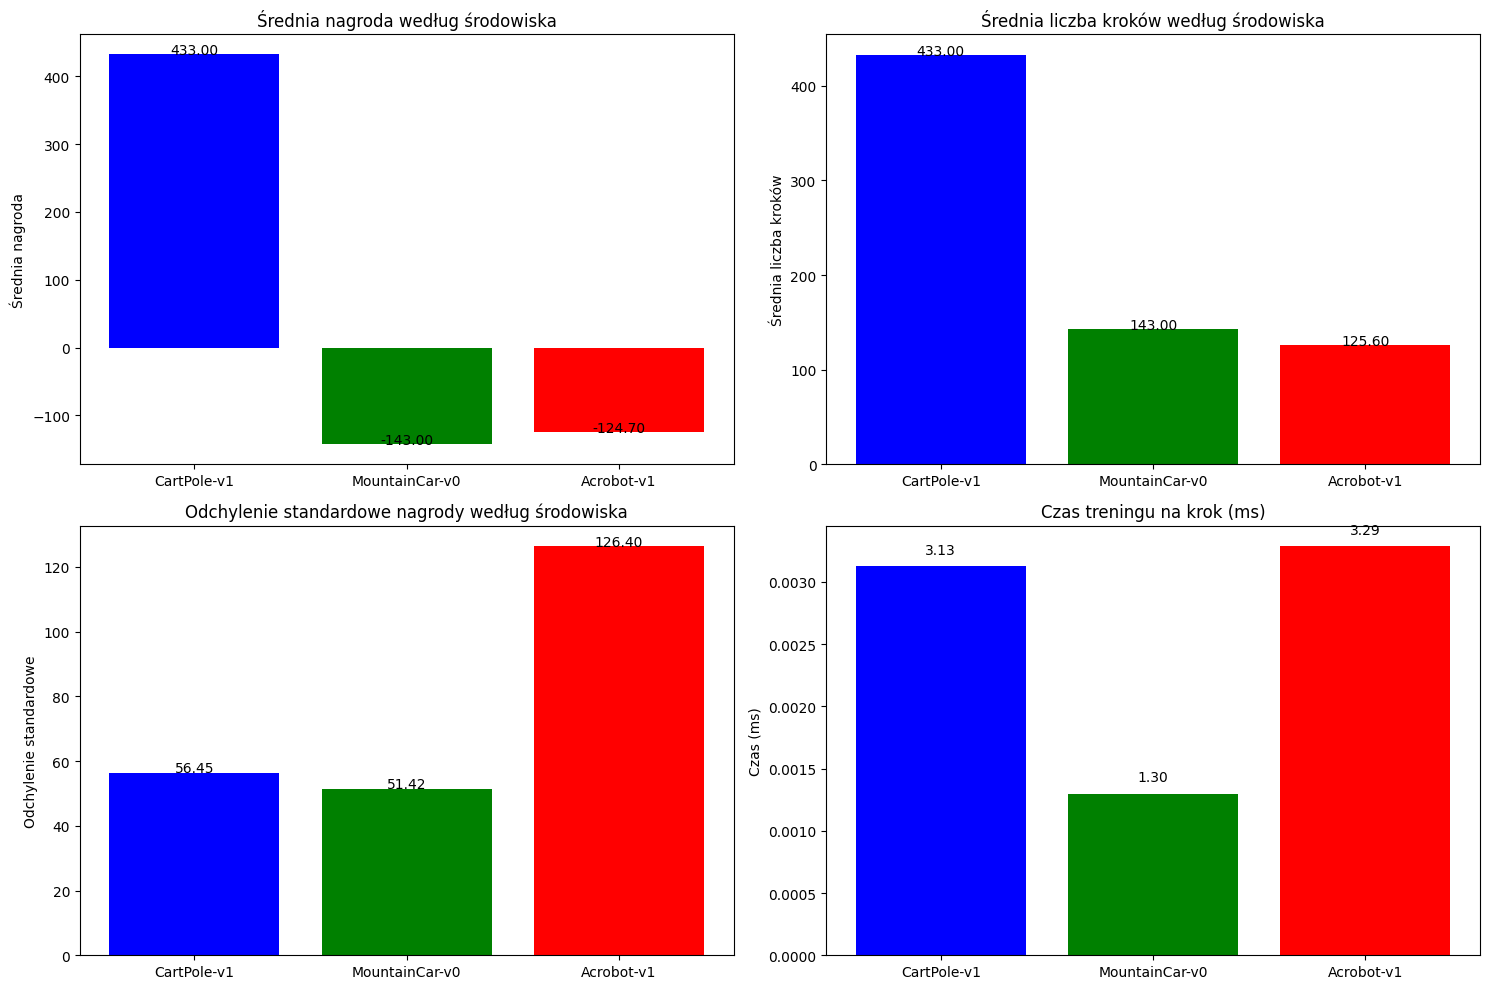


Wyniki ewaluacji modeli:
+----------------+------------+-------------------+---------------+---------------+------------------------+-------------------------+---------------------+-----------------+
| Środowisko     | Algorytm   |   Średnia nagroda |   Min nagroda |   Max nagroda |   Odch. stand. nagrody |   Średnia liczba kroków |   Czas treningu (s) |   Kroki/sekunda |
+================+============+===================+===============+===============+========================+=========================+=====================+=================+
| CartPole-v1    | PPO        |             433   |           374 |           500 |                  56.45 |                   433   |              156.31 |          319.88 |
+----------------+------------+-------------------+---------------+---------------+------------------------+-------------------------+---------------------+-----------------+
| MountainCar-v0 | DQN        |            -143   |          -200 |           -85 |                

In [19]:
import matplotlib.pyplot as plt

def evaluate_model(model, env_name, episodes=10):
    env = gym.make(env_name, render_mode=None)
    rewards = []
    steps = []

    for episode in range(episodes):
        done = False
        terminated = False
        obs, _ = env.reset()
        total_reward = 0
        step_count = 0

        while not (done or terminated):
            action, _ = model.predict(obs, deterministic=True)
            obs, reward, terminated, truncated, info = env.step(action)
            done = truncated
            total_reward += reward
            step_count += 1

        rewards.append(total_reward)
        steps.append(step_count)
        print(f"Epizod {episode+1}: Nagroda = {total_reward:.2f}, Kroki = {step_count}")

    return rewards, steps

try:
    # Próba wczytania najlepszych modeli, jeśli zostały zapisane
    print("Wczytywanie wytrenowanych modeli...")
    model1_loaded = PPO.load("./trained_models/model1/best_model.zip", device=device)
    model2_loaded = DQN.load("./trained_models/model2/best_model.zip", device=device)
    model3_loaded = A2C.load("./trained_models/model3/best_model.zip", device=device)
    print("Wczytano zapisane modele.")
except FileNotFoundError:
    # Jeśli nie ma najlepszych modeli, używamy ostatnio wytrenowanych
    try:
        print("Próba wczytania finalnych modeli...")
        model1_loaded = PPO.load("./trained_models/final_ppo_CartPole-v1", device=device)
        model2_loaded = DQN.load("./trained_models/final_dqn_MountainCar-v0", device=device)
        model3_loaded = A2C.load("./trained_models/final_a2c_Acrobot-v1", device=device)
        print("Wczytano finalne modele.")
    except FileNotFoundError:
        print("Nie znaleziono zapisanych modeli. Używanie ostatnio wytrenowanych...")
        model1_loaded = model1
        model2_loaded = model2
        model3_loaded = model3

# Ewaluacja każdego modelu
print(f"\nEwaluacja {env1_name} z PPO:")
rewards1, steps1 = evaluate_model(model1_loaded, env1_name)

print(f"\nEwaluacja {env2_name} z DQN:")
rewards2, steps2 = evaluate_model(model2_loaded, env2_name)

print(f"\nEwaluacja {env3_name} z A2C:")
rewards3, steps3 = evaluate_model(model3_loaded, env3_name)

# Wizualizacja wyników
environments = [env1_name, env2_name, env3_name]
avg_rewards = [np.mean(rewards1), np.mean(rewards2), np.mean(rewards3)]

plt.figure(figsize=(15, 10))

# Wykres nagród
plt.subplot(2, 2, 1)
plt.bar(environments, avg_rewards, color=['blue', 'green', 'red'])
plt.title('Średnia nagroda według środowiska')
plt.ylabel('Średnia nagroda')
for i, v in enumerate(avg_rewards):
    plt.text(i, v + 0.1, f"{v:.2f}", ha='center')

# Wykres kroków
plt.subplot(2, 2, 2)
avg_steps = [np.mean(steps1), np.mean(steps2), np.mean(steps3)]
plt.bar(environments, avg_steps, color=['blue', 'green', 'red'])
plt.title('Średnia liczba kroków według środowiska')
plt.ylabel('Średnia liczba kroków')
for i, v in enumerate(avg_steps):
    plt.text(i, v + 0.1, f"{v:.2f}", ha='center')

# Wariancja nagrody
plt.subplot(2, 2, 3)
std_rewards = [np.std(rewards1), np.std(rewards2), np.std(rewards3)]
plt.bar(environments, std_rewards, color=['blue', 'green', 'red'])
plt.title('Odchylenie standardowe nagrody według środowiska')
plt.ylabel('Odchylenie standardowe')
for i, v in enumerate(std_rewards):
    plt.text(i, v + 0.1, f"{v:.2f}", ha='center')

# Czas treningu na krok
plt.subplot(2, 2, 4)
timesteps = [timesteps1, timesteps2, timesteps3]
training_times = [training_time1, training_time2, training_time3]
time_per_step = [t/s for t, s in zip(training_times, timesteps)]
plt.bar(environments, time_per_step, color=['blue', 'green', 'red'])
plt.title('Czas treningu na krok (ms)')
plt.ylabel('Czas (ms)')
for i, v in enumerate(time_per_step):
    plt.text(i, v + 0.0001, f"{v*1000:.2f}", ha='center')

plt.tight_layout()
plt.show()

# Tworzenie szczegółowej tabeli wyników
results_data = {
    'Środowisko': environments,
    'Algorytm': ['PPO', 'DQN', 'A2C'],
    'Średnia nagroda': [f"{np.mean(rewards1):.2f}", f"{np.mean(rewards2):.2f}", f"{np.mean(rewards3):.2f}"],
    'Min nagroda': [f"{np.min(rewards1):.2f}", f"{np.min(rewards2):.2f}", f"{np.min(rewards3):.2f}"],
    'Max nagroda': [f"{np.max(rewards1):.2f}", f"{np.max(rewards2):.2f}", f"{np.max(rewards3):.2f}"],
    'Odch. stand. nagrody': [f"{np.std(rewards1):.2f}", f"{np.std(rewards2):.2f}", f"{np.std(rewards3):.2f}"],
    'Średnia liczba kroków': [f"{np.mean(steps1):.2f}", f"{np.mean(steps2):.2f}", f"{np.mean(steps3):.2f}"],
    'Czas treningu (s)': [f"{training_time1:.2f}", f"{training_time2:.2f}", f"{training_time3:.2f}"],
    'Kroki/sekunda': [f"{timesteps1/training_time1:.2f}", f"{timesteps2/training_time2:.2f}", f"{timesteps3/training_time3:.2f}"]
}

# Wyświetlanie tabeli wyników
results_df = pd.DataFrame(results_data)
print("\nWyniki ewaluacji modeli:")
print(tabulate(results_df, headers='keys', tablefmt='grid', showindex=False))

### Wnioski
Akceleracja GPU znacząco przyspieszyła trening algorytmów uczenia ze wzmocnieniem, szczególnie DQN w MountainCar, gdzie operacje na buforze doświadczeń były najbardziej złożone obliczeniowo. Algorytmy wykazały różną skuteczność w zależności od środowiska: PPO najlepiej radził sobie w CartPole osiągając wysokie, stabilne wyniki, DQN efektywnie rozwiązywał problem opóźnionej nagrody w MountainCar, a A2C oferował dobry kompromis wydajności w Acrobot. Złożoność środowiska bezpośrednio korelowała z wymaganym czasem treningu - CartPole potrzebował najmniej czasu ze względu na prostą dynamikę, podczas gdy MountainCar i Acrobot wymagały znacznie dłuższego treningu.